In [4]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
# Join entre Stress e Feedbacks


feedbacks = pd.read_csv("Feedbacks 17_08 - video_sessions_feedback.csv", parse_dates=['created_date'])
stress = pd.read_csv("Stress 17_08 - video_sessions_stressfeedback.csv", parse_dates=['created_date'])

feedbacks_stress = pd.DataFrame()

feedbacks['estresse'] = np.zeros(len(feedbacks))

for i in range(len(stress)):
    if type(stress.iloc[i]['session_id']) == str:
        feeds_to_add = feedbacks[ feedbacks['session_id'] == stress.iloc[i]['session_id'] ]
        
    else:
        feeds_to_add = feedbacks[ feedbacks['email'] == stress.iloc[i]['email'] ]
      
    feeds_to_add['estresse'] = stress.loc[i, 'estresse']
    feedbacks_stress = feedbacks_stress.append(feeds_to_add)
    


In [6]:
# Join entre Stress e Feedbacks

feedbacks = pd.read_csv("Feedbacks 17_08 - video_sessions_feedback.csv", parse_dates=['created_date'])
stress = pd.read_csv("Stress 17_08 - video_sessions_stressfeedback.csv", parse_dates=['created_date'])

stress_sid = stress[pd.notna(stress['session_id'])] # pega os que tem session_id preenchido
stress_email = stress[pd.notna(stress['email'])] # pega os que tem email preenchido
stress_email = stress_email[ ~stress_email['session_id'].isin(stress_sid['session_id']) ] # pega os que tem email sem session_id
stress_final = pd.concat([stress_sid, stress_email])

feedbacks_stress = pd.merge(feedbacks, stress_final, on=['session_id', 'email'], how='inner')

feedbacks_stress.tail()

,id_x,num_sessao_x,num_video_preferido,justificativa,created_date_x,published_date_x,incomodo,interesse1,interesse2,comment,email,english_x,session_id,versao,id_y,estresse,num_sessao_y,created_date_y,published_date_y,english_y
243,291,3,2,Sem falhas irritantes.,2018-07-16 02:09:17,2018-07-16 2:09:17,5,4,3,NaN,alinedecampos@gmail.com,0,1h623utxo8c0bma05wfil72f45kkivx6,2,124,9,8,2018-07-16 02:02:12.824328,2018-07-16 02:02:12.833335,0
244,292,4,2,Tudo melhor.,2018-07-16 02:10:37,2018-07-16 2:10:37,4,2,4,NaN,alinedecampos@gmail.com,0,1h623utxo8c0bma05wfil72f45kkivx6,2,124,9,8,2018-07-16 02:02:12.824328,2018-07-16 02:02:12.833335,0
245,293,7,2,"N??o travou, embora a qualidade fosse menor",2018-07-16 17:29:18,2018-07-16 17:29:18,5,4,4,NaN,NaN,0,b0f98wleqlv33bmmyfdqcyugyb5ee8hr,2,125,6,8,2018-07-16 17:26:39.127687,2018-07-16 17:26:39.216543,0
246,294,2,2,N??o travou,2018-07-16 17:31:03,2018-07-16 17:31:03,5,5,5,NaN,NaN,0,b0f98wleqlv33bmmyfdqcyugyb5ee8hr,2,125,6,8,2018-07-16 17:26:39.127687,2018-07-16 17:26:39.216543,0
247,295,4,1,Mais interessante,2018-07-16 17:33:20,2018-07-16 17:33:20,4,3,3,NaN,NaN,0,b0f98wleqlv33bmmyfdqcyugyb5ee8hr,2,125,6,8,2018-07-16 17:26:39.127687,2018-07-16 17:26:39.216543,0


In [7]:
#normaliza os dados da versao 1 para range de 5
feedbacks_stress.loc[feedbacks_stress['versao'] == 1, ['incomodo', 'interesse1', 'interesse2'] ] //= 2


In [8]:
# inversao dos valores das sessoes que tem o primeiro video com QoS alta
feedbacks_stress = feedbacks_stress.reset_index(drop=True)

for i in range(len(feedbacks_stress.index)):
    if feedbacks_stress.loc[i, 'created_date_x'].month < 7:
        if feedbacks_stress.loc[i]['num_sessao_x'] in (1, 3, 6):
            feedbacks_stress.at[i, 'interesse1'], feedbacks_stress.at[i, 'interesse2'] = feedbacks_stress.at[i, 'interesse2'], feedbacks_stress.at[i, 'interesse1']
            if feedbacks_stress.at[i, 'num_video_preferido'] == 1:
                feedbacks_stress.at[i, 'num_video_preferido'] = 2
            else:
                feedbacks_stress.at[i, 'num_video_preferido'] = 1                   
    else:
        if feedbacks_stress.loc[i, 'num_sessao_x'] in (1, 5):
            feedbacks_stress.at[i, 'interesse1'], feedbacks_stress.at[i, 'interesse2'] = feedbacks_stress.at[i, 'interesse2'], feedbacks_stress.at[i, 'interesse1']
            
            if feedbacks_stress.at[i, 'num_video_preferido'] == 1:
                feedbacks_stress.at[i, 'num_video_preferido'] = 2
            else:
                feedbacks_stress.at[i, 'num_video_preferido'] = 1


In [9]:
#estatisticas basicas
feedbacks_stress.describe()

# print(feedbacks_stress.loc[7, ['incomodo', 'interesse1', 'interesse2', 'num_video_preferido', 'justificativa']])

,id_x,num_sessao_x,num_video_preferido,incomodo,interesse1,interesse2,english_x,versao,id_y,estresse,num_sessao_y,english_y
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.0,248.000000
mean,163.250000,4.129032,1.439516,3.637097,3.193548,2.479839,0.012097,1.854839,58.310484,6.806452,8.0,0.012097
std,77.268827,2.057740,0.497332,1.271517,1.389244,1.566216,0.109539,0.352976,38.625320,2.413449,0.0,0.109539
min,21.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.0,0.000000
25%,101.750000,2.000000,1.000000,3.000000,2.000000,1.000000,0.000000,2.000000,25.000000,5.000000,8.0,0.000000
50%,162.500000,4.000000,1.000000,4.000000,3.500000,3.000000,0.000000,2.000000,55.000000,7.000000,8.0,0.000000
75%,233.250000,6.000000,2.000000,5.000000,4.000000,4.000000,0.000000,2.000000,94.000000,8.000000,8.0,0.000000
max,295.000000,7.000000,2.000000,5.000000,5.000000,5.000000,1.000000,2.000000,125.000000,10.000000,8.0,1.000000


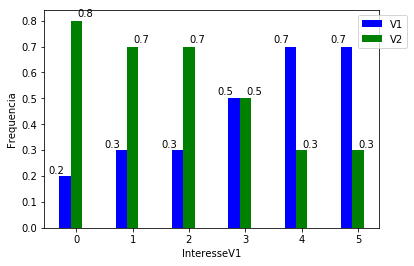

In [10]:
# grafico (interessev1 x preferencia/escolha usuario)

counts = feedbacks_stress.groupby(['interesse1','num_video_preferido'], as_index=False).size().unstack(fill_value=0).reset_index()
counts['V1_percent'] = round(counts[1]/(counts[1]+counts[2]), 1)
counts['V2_percent'] = round(counts[2]/(counts[1]+counts[2]), 1)

ax = plt.subplot()
b1 = ax.bar(counts['interesse1']-0.2, counts['V1_percent'],width=0.2,color='b',align='center')
b2 = ax.bar(counts['interesse1'], counts['V2_percent'],width=0.2,color='g',align='center')






leg = plt.legend((b1[0], b2[0]), ('V1', 'V2'), loc = 'upper right')

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0.1
bb.x0 += xOffset
bb.x1 += xOffset

leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

plt.ylabel('Frequencia')
plt.xlabel('InteresseV1')


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(b1, "left")
autolabel(b2, "right")
plt.show()

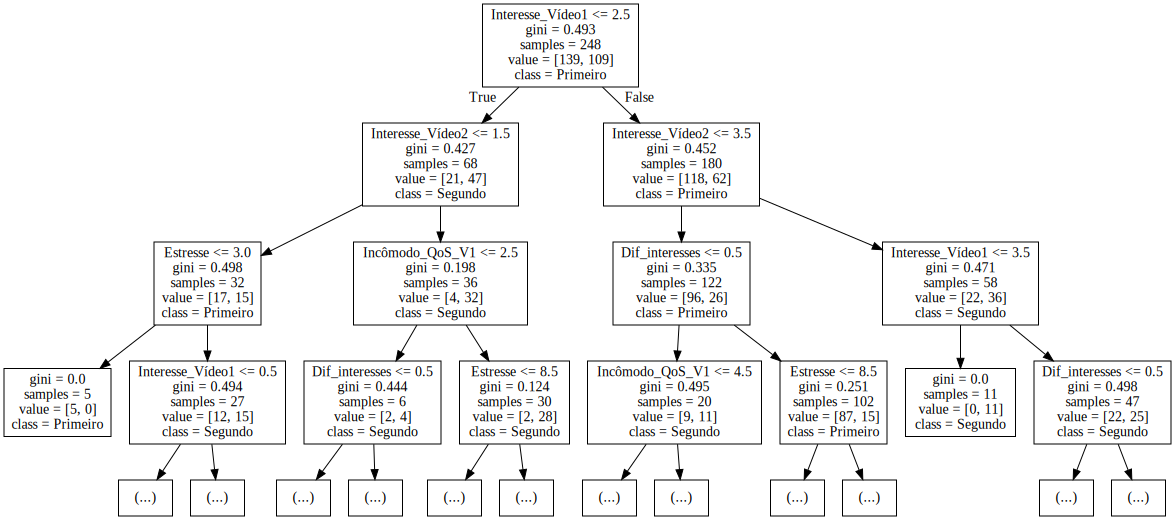

In [11]:
#Arvore de decisao

clf = tree.DecisionTreeClassifier()
feedbacks_stress['dif_interesses'] = abs(feedbacks_stress['interesse1'] - feedbacks_stress['interesse2'])
X = np.array([feedbacks_stress['incomodo'], feedbacks_stress['interesse1'], 
              feedbacks_stress['interesse2'], feedbacks_stress['dif_interesses'], feedbacks_stress['estresse']]).transpose()

Y = np.array(feedbacks_stress['num_video_preferido'])

clf.fit(X, Y)

 
feature_names=['Incômodo_QoS_V1', 'Interesse_Vídeo1', 'Interesse_Vídeo2', 'Dif_interesses', 'Estresse']
    
dot_data = tree.export_graphviz(clf, max_depth=3, feature_names=feature_names,
                                            class_names=['Primeiro', 'Segundo'],out_file=None) 
graph = graphviz.Source(dot_data)
# graph.render("feeds_1807_estresse_x")
graph


In [12]:
# prepara para aplicar os algoritmos de ML

label = feedbacks_stress.num_video_preferido
label = label.astype('int').reshape(-1,1)


feedbacks_stress_text = feedbacks_stress.drop(['id_x','id_y', 'email','num_sessao_x','num_sessao_y','num_video_preferido', 'created_date_x','created_date_y',
                                               'comment','published_date_x', 'published_date_y', 'english_x','english_y', 'session_id','versao'], axis=1)
feedbacks_stress = feedbacks_stress_text.drop(['justificativa'], axis=1)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [13]:
class Results:
    def __init__(self):
        pass
    nb, tree, sgd, lsvc, svc, kmeans, knn, rf, mlp, cross, test, index = [],[],[],[],[],[],[],[],[],[],[],[]

def getAverage(results_array):
    precisionAvg = 0
    accuracyAvg = 0
    size = len(results_array)
    for i in range (size):
        precisionAvg += results_array[i][2]
        accuracyAvg += results_array[i][3]
    return [precisionAvg/size, accuracyAvg/size]    
    
def run_algorithms(results, df_data, label):
    #Initialize test and train data
#     from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
    X = df_data.iloc[:, :].values
    y = np.ravel(label)
#     x_train, x_test, y_train, y_test = train_test_split(df_data, label, test_size=0.3)
    
    
    for train_index, test_index in kf.split(df_data, y):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        results.index += [[train_index, test_index]]
        
        #Naive Bayes
        from sklearn.naive_bayes import MultinomialNB
        nb_clf = MultinomialNB().fit(x_train, y_train)
        nb_y_pred = nb_clf.predict(x_test)
        nb_cm = confusion_matrix(y_test, nb_y_pred)
        nb_p1 = precision_score(y_test, nb_y_pred)
        nb_p2 = precision_score(y_test, nb_y_pred, pos_label=2)
        nb_p = precision_score(y_test, nb_y_pred, average='weighted')
        nb_a = accuracy_score(y_test, nb_y_pred)
        nb_r = classification_report(y_test, nb_y_pred)
        results.nb += [[nb_p1, nb_p2, nb_p, nb_a, nb_cm, nb_r]]


        #Decision Trees
        from sklearn import tree
        tree_clf = tree.DecisionTreeClassifier().fit(x_train, y_train)
        tree_y_pred = tree_clf.predict(x_test)
        tree_cm = confusion_matrix(y_test, tree_y_pred)
        tree_p1 = precision_score(y_test, tree_y_pred)
        tree_p2 = precision_score(y_test, tree_y_pred, pos_label=2)
        tree_p = precision_score(y_test, tree_y_pred, average='weighted')
        tree_a = accuracy_score(y_test, tree_y_pred)
        tree_r = classification_report(y_test, tree_y_pred)
        results.tree += [[tree_p1, tree_p2, tree_p, tree_a, tree_cm, tree_r]]


        #Stochastic Gradient Descent
        from sklearn.linear_model import SGDClassifier
        sgd_clf = SGDClassifier(alpha=.000001, max_iter=50000, tol=1e-6).fit(x_train, y_train)
        sgd_y_pred = sgd_clf.predict(x_test)
        sgd_cm = confusion_matrix(y_test, sgd_y_pred)
        sgd_p1 = precision_score(y_test, sgd_y_pred)
        sgd_p2 = precision_score(y_test, sgd_y_pred, pos_label=2)
        sgd_p = precision_score(y_test, sgd_y_pred, average='weighted')
        sgd_a = accuracy_score(y_test, sgd_y_pred)
        sgd_r = classification_report(y_test, sgd_y_pred)
        results.sgd += [[sgd_p1, sgd_p2, sgd_p, sgd_a, sgd_cm, sgd_r]]


        #Linear SVC
        from sklearn.svm import LinearSVC
        lsvc_clf = LinearSVC(dual=False, max_iter=10000, tol=1e-6).fit(x_train, y_train)
        lsvc_y_pred = lsvc_clf.predict(x_test)
        lsvc_cm = confusion_matrix(y_test, lsvc_y_pred)
        lsvc_p1 = precision_score(y_test, lsvc_y_pred)
        lsvc_p2 = precision_score(y_test, lsvc_y_pred, pos_label=2)
        lsvc_p = precision_score(y_test, lsvc_y_pred, average='weighted')
        lsvc_a = accuracy_score(y_test, lsvc_y_pred)
        lsvc_r = classification_report(y_test,lsvc_y_pred)
        results.lsvc += [[lsvc_p1, lsvc_p2, lsvc_p, lsvc_a, lsvc_cm, lsvc_r]]


        #SVC
        from sklearn.svm import SVC
        svc_clf = SVC(cache_size=2000, probability = True).fit(x_train, y_train)
        svc_y_pred = svc_clf.predict(x_test)
        svc_cm = confusion_matrix(y_test, svc_y_pred)
        svc_p1 = precision_score(y_test, svc_y_pred)
        svc_p2 = precision_score(y_test, svc_y_pred, pos_label=2)
        svc_p = precision_score(y_test, svc_y_pred, average='weighted')
        svc_a = accuracy_score(y_test, svc_y_pred)
        svc_r = classification_report(y_test,svc_y_pred) 
        results.svc += [[svc_p1, svc_p2, svc_p, svc_a, svc_cm, svc_r]]

        #KNN Classifier
        from sklearn.neighbors import KNeighborsClassifier
        knn_clf = KNeighborsClassifier(n_neighbors=15).fit(x_test, y_test)
        knn_y_pred = knn_clf.predict(x_test)
        knn_cm = confusion_matrix(y_test, knn_y_pred)
        knn_p1 = precision_score(y_test, knn_y_pred)
        knn_p2 = precision_score(y_test, knn_y_pred, pos_label=2)
        knn_p = precision_score(y_test, knn_y_pred, average='weighted')
        knn_a = accuracy_score(y_test, knn_y_pred)
        knn_r = classification_report(y_test, knn_y_pred)
        results.knn += [[knn_p1, knn_p2, knn_p, knn_a, knn_cm, knn_r]]

        #Random Forest Algorithm
        from sklearn.ensemble import RandomForestClassifier 
        rf_clf = RandomForestClassifier(n_estimators=100, random_state=0).fit(x_train, y_train)
        rf_y_pred = rf_clf.predict(x_test)
        rf_cm = confusion_matrix(y_test, rf_y_pred)
        rf_p1 = precision_score(y_test, rf_y_pred)
        rf_p2 = precision_score(y_test, rf_y_pred, pos_label=2)
        rf_p = precision_score(y_test, rf_y_pred, average='weighted')
        rf_a = accuracy_score(y_test, rf_y_pred)
        rf_r = classification_report(y_test, rf_y_pred)
        results.rf += [[rf_p1, rf_p2, rf_p, rf_a, rf_cm, rf_r]]


        #Neural Network
        from sklearn.neural_network import MLPClassifier
        mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-6, hidden_layer_sizes=(15,15),
                                max_iter=1000, learning_rate='adaptive', ).fit(x_train, y_train)
        mlp_y_pred = mlp_clf.predict(x_test)
        mlp_cm = confusion_matrix(y_test, mlp_y_pred)
        mlp_p1 = precision_score(y_test, mlp_y_pred)
        mlp_p2 = precision_score(y_test, mlp_y_pred, pos_label=2)
        mlp_p = precision_score(y_test, mlp_y_pred, average='weighted')
        mlp_a = accuracy_score(y_test, mlp_y_pred)
        mlp_r = classification_report(y_test, mlp_y_pred)
        results.mlp += [[mlp_p1, mlp_p2, mlp_p, mlp_a, mlp_cm, mlp_r]]
        
        results.test += [[y_test, nb_y_pred, tree_y_pred, sgd_y_pred, lsvc_y_pred, svc_y_pred, knn_y_pred, rf_y_pred, mlp_y_pred]]
    
    results.cross = [getAverage(results.nb), getAverage(results.tree), getAverage(results.sgd), getAverage(results.lsvc),
                     getAverage(results.svc), getAverage(results.knn), getAverage(results.rf), getAverage(results.mlp)]
    return results

def print_results(results, text=""):
    #Write to file
    writer = pd.ExcelWriter('output'+str(text)+'.xlsx')
    column_label = ['Precision(1)', 'Precision(2)', 'Precision(Avg)', 'Accuracy', 'ConfusionMatrix', 'Summary']
    df_nb = pd.DataFrame(data=results.nb, columns = column_label)
    df_tree = pd.DataFrame(data=results.tree, columns = column_label)
    df_sgd = pd.DataFrame(data=results.sgd, columns = column_label)
    df_lsvc = pd.DataFrame(data=results.lsvc, columns = column_label)
    df_svc = pd.DataFrame(data=results.svc, columns = column_label)
    df_knn = pd.DataFrame(data=results.knn, columns = column_label)
    df_rf = pd.DataFrame(data=results.rf, columns = column_label)
    df_mlp = pd.DataFrame(data=results.mlp, columns = column_label)
    df_index = pd.DataFrame(data=results.index, columns = ['Train Index', 'Test Index'])
    df_cross = pd.DataFrame(data=results.cross, columns = ['Precision Average', 'Accuracy Average'])
    
    df_nb.to_excel(writer,'Naive Bayes')
    df_tree.to_excel(writer,'Decision Tree')
    df_sgd.to_excel(writer,'Stochastic Gradient Descent')
    df_lsvc.to_excel(writer,'Linear SVC')
    df_svc.to_excel(writer,'Support Vector Classification')
    df_knn.to_excel(writer,'K-Nearest Neighbors')
    df_rf.to_excel(writer,'Random Forest')
    df_mlp.to_excel(writer,'Multi Layer Perceptron')
    df_index.to_excel(writer, 'Cross Validation Index')
    df_cross.to_excel(writer, 'Cross Validation Average')

    writer.save()
    

In [14]:
#Main():
import scikitplot as skplt
container = Results()
container = run_algorithms(container, feedbacks_stress, label)
    
# for i in range(10):
#     skplt.metrics.plot_confusion_matrix(container.test[i][0], container.test[i][1], normalize=True)
    
print_results(container)

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
def searchParameters(X, y, classifier, parameters, scores =['accuracy', 'precision_weighted'], text=''):
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)

    writer = pd.ExcelWriter('parameters_'+str(text)+'.xlsx')
    parameters = []
    for score in scores:
        clf = GridSearchCV(classifier, parameters_mlp, cv=10,
                           scoring= score, n_jobs=4)
        clf.fit(X_train, y_train)
        y_true, y_pred = y_test, clf.predict(X_test)

        parameters += [[clf.best_params_, score, clf.best_score_, classification_report(y_true, y_pred)]]
        df_parameters = pd.DataFrame(data=parameters, columns = ['Best Parameters', 'Metric', 'Score Value', 'Classification Report'])

    df_parameters.to_excel(writer, 'Grid Search Result')
    writer.save()


from sklearn.neural_network import MLPClassifier
parameters = [{'activation':['relu'], 'solver':['lbfgs'], 'alpha':[0.00001, 0.00005, 0.00009, 0.0001, 0.0002, 0.0003] ,
                     'learning_rate':['invscaling','constant'], 'learning_rate_init':[0.0005, 0.001, 0.002, 0.003, 0.004, 0.006],
                   'hidden_layer_sizes':[5,8,9,10,11,12,15]}]


#RUN FUNCTION
searchParameters(feedbacks_stress, np.ravel(label), MLPClassifier(max_iter=150, tol=0.00001), parameters, text='mlp')

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


KeyError: 'mean_train_accuracy'

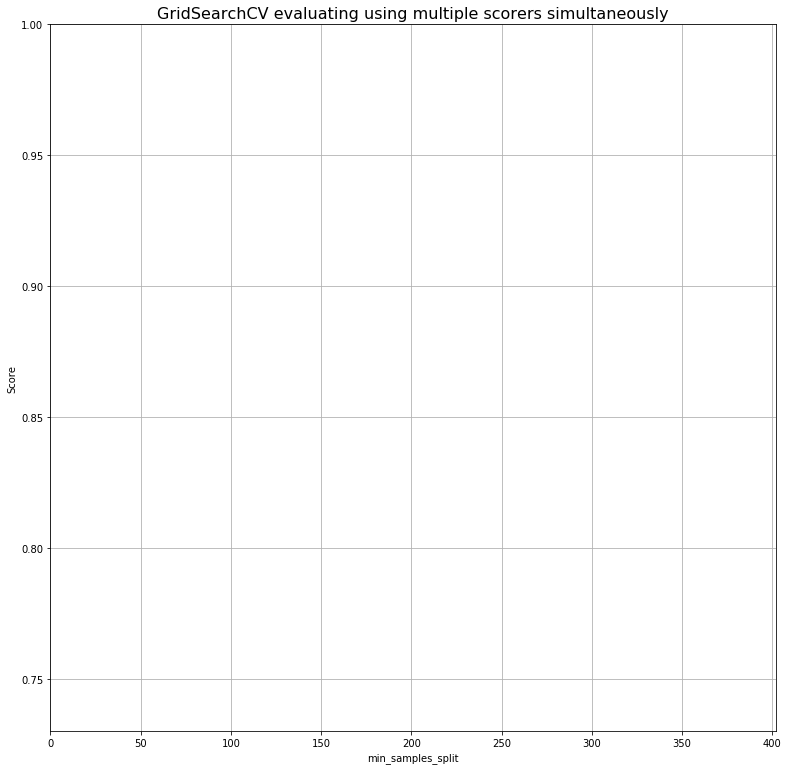

In [47]:
# def plotCurve(results, scoring=['accuracy', 'precision_weighted']):
#     plt.figure(figsize=(13, 13))
#     plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
#               fontsize=16)

#     plt.xlabel("min_samples_split")
#     plt.ylabel("Score")
#     plt.grid()

#     ax = plt.axes()
#     ax.set_xlim(0, 402)
#     ax.set_ylim(0.73, 1)

#     # Get the regular numpy array from the MaskedArray
#     X_axis = np.array(results['param_hidden_layer_sizes'].data, dtype=float)

#     for scorer, color in zip(sorted(scoring), ['g', 'k']):
#         for sample, style in (('train', '--'), ('test', '-')):
#             sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
#             sample_score_std = results['std_%s_%s' % (sample, scorer)]
#             ax.fill_between(X_axis, sample_score_mean - sample_score_std,
#                             sample_score_mean + sample_score_std,
#                             alpha=0.1 if sample == 'test' else 0, color=color)
#             ax.plot(X_axis, sample_score_mean, style, color=color,
#                     alpha=1 if sample == 'test' else 0.7,
#                     label="%s (%s)" % (scorer, sample))

#         best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
#         best_score = results['mean_test_%s' % scorer][best_index]

#         # Plot a dotted vertical line at the best score for that scorer marked by x
#         ax.plot([X_axis[best_index], ] * 2, [0, best_score],
#                 linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

#         # Annotate the best score for that scorer
#         ax.annotate("%0.2f" % best_score,
#                     (X_axis[best_index], best_score + 0.005))

#     plt.legend(loc="best")
#     plt.grid('off')
#     plt.show()

# def searchParameters(X, y, classifier, parameters, scores =['accuracy', 'precision_weighted'], text=''):
#     from sklearn.model_selection import GridSearchCV
#     from sklearn.metrics import classification_report
#     from sklearn.model_selection import train_test_split
    
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.3, random_state=0)

#     writer = pd.ExcelWriter('parameters_'+str(text)+'.xlsx')
#     parameters = []
#     clf = GridSearchCV(classifier, parameters_mlp, cv=10,
#                            scoring= score, refit = scores[1], n_jobs=4)
#     clf.fit(X_train, y_train)
#     y_true, y_pred = y_test, clf.predict(X_test)
    
#     parameters += [[clf.best_params_, scores[0]+' and '+scores[1], clf.best_score_, classification_report(y_true, y_pred)]]
#     df_parameters = pd.DataFrame(data=parameters, columns = ['Best Parameters', 'Metric', 'Score Value', 'Classification Report'])

#     df_parameters.to_excel(writer, 'Grid Search Result')
#     writer.save()

# from sklearn.neural_network import MLPClassifier
# parameters = [{'activation':['relu'], 'solver':['lbfgs'], 'alpha':[0.00001, 0.00005, 0.00009, 0.0001, 0.0002, 0.0003] ,
#                      'learning_rate':['invscaling','constant'], 'learning_rate_init':[0.0005, 0.001, 0.002, 0.003, 0.004, 0.006],
#                    'hidden_layer_sizes':[5,8,9,10,11,12,15]}]


# #RUN FUNCTION
# searchParameters(feedbacks_stress, np.ravel(label), MLPClassifier(max_iter=150, tol=0.00001), parameters, text='mlp_multiMetric2')

,incomodo,interesse1,interesse2,estresse,dif_interesses
0,1,3,1,7,2
1,3,5,3,7,2
2,4,4,1,7,3
3,3,4,4,7,0
4,5,2,2,10,0
5,0,0,0,10,0
6,5,3,0,10,3
7,0,0,0,10,0
8,4,0,0,10,0
9,5,2,2,10,0


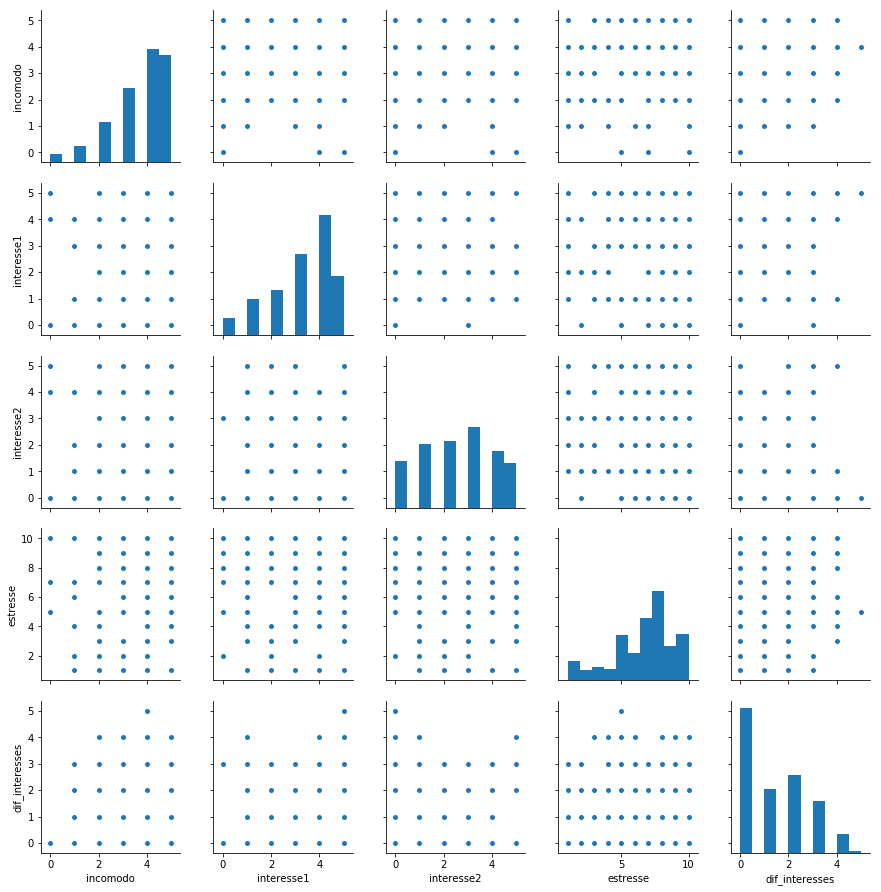

In [296]:
# import seaborn as sns
# plt.figure(figsize=(13,10))
# sns.heatmap(feedbacks_stress.corr(), vmax=0.8, annot=True, cmap="YlGnBu")

# feedbacks_stress.estresse.plot(kind='bar')
# feedbacks_stress[['interesse1','interesse2']].plot.hist(alpha=0.5)
# feedbacks_stress


pd.set_option('display.max_rows', 1000)
sns.pairplot(feedbacks_stress[['incomodo','interesse1','interesse2','estresse','dif_interesses']])
feedbacks_stress